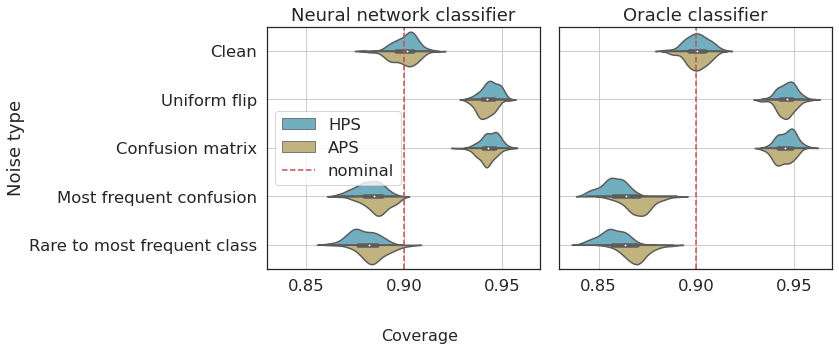

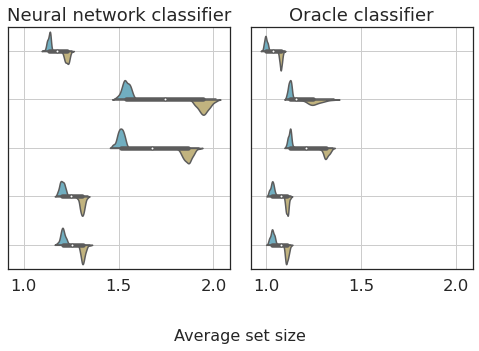

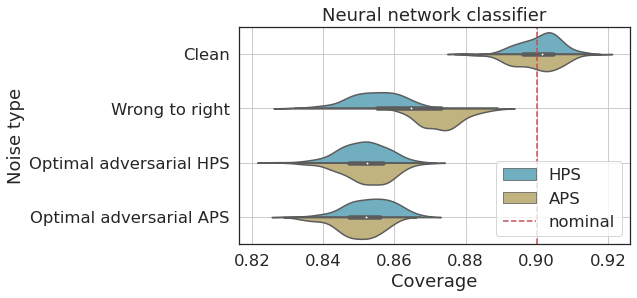

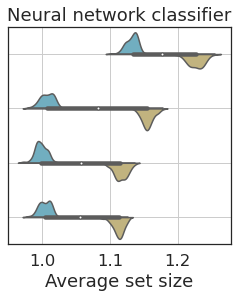

In [22]:
# general imports
import argparse
import pandas as pd
import plotnine as gg
import os
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 16})

# parameters
# parser = argparse.ArgumentParser(description='Experiments')
# parser.add_argument('-a', '--alpha', default=0.1, type=np.float64, help='Desired nominal marginal coverage')
# parser.add_argument('--noise_probability', default=0.1, type=np.float64,
#                     help='Desired portion of the calibration points to add label noise')

# args = parser.parse_args()

# initiate parameters
alpha = 0.1  # desired nominal marginal coverage
noise_probability = 0.05

# directory to load results
directory = "./Results/alpha_" + str(alpha) + "/noise_portion_" + str(noise_probability)

merged_data_frame = pd.DataFrame()
for subdir, dirs, files in os.walk(directory):
    for file in files:
        if file.endswith(".csv"):
            new_frame = pd.read_csv(os.path.join(subdir, file))
            merged_data_frame = pd.concat([merged_data_frame, new_frame])
            
# merged_data_frame.to_csv(directory+'/final_results.csv')


# final_results_all = pd.read_csv(directory+'/final_results.csv')
final_results_all = merged_data_frame.copy()
final_results_NN = final_results_all[final_results_all['Model']=='NN']
final_results_oracle = final_results_all[final_results_all['Model']=='Oracle']

# final_results_NN_copy = final_results_NN.copy()
# final_results_NN_copy = final_results_NN_copy.drop(['Model','Marginal Coverage', 'Unnamed: 0'], axis=1)

# final_results_oracle_copy = final_results_oracle.copy()
# final_results_oracle_copy = final_results_oracle_copy.drop(['Model','Marginal Coverage', 'Unnamed: 0'], axis=1)

# import ast

# final_results_NN_flattened=pd.DataFrame()
# final_results_oracle_flattened=pd.DataFrame()

        
# n_test = len(np.array(ast.literal_eval(final_results_NN_copy.iloc[0]['Average Set Size'])))

# for i in range(len(final_results_NN_copy)):
#     df = pd.DataFrame({
#         "Noise Type": np.repeat(final_results_NN_copy['Noise Type'].iloc[i], n_test),
#         "Score Function": np.repeat(final_results_NN_copy['Score Function'].iloc[i], n_test),
#         'Average Set Size': np.array(ast.literal_eval(final_results_NN_copy.iloc[i]['Average Set Size']))})
#     final_results_NN_flattened = pd.concat([final_results_NN_flattened, df])
    
    
# for i in range(len(final_results_oracle_copy)):
#     df = pd.DataFrame({
#         "Noise Type": np.repeat(final_results_oracle_copy['Noise Type'].iloc[i], n_test),
#         "Score Function": np.repeat(final_results_oracle_copy['Score Function'].iloc[i], n_test),
#         'Average Set Size': np.array(ast.literal_eval(final_results_oracle_copy.iloc[i]['Average Set Size']))})
#     final_results_oracle_flattened = pd.concat([final_results_oracle_flattened, df])
    
# print(final_results_NN_flattened)


import seaborn as sns
sns.set(rc={'figure.figsize':(5,3)})
sns.set(font_scale=1.5, style='white')

fig, axes = plt.subplots(1, 2, sharey=True, figsize=[12,5], sharex=True)
sns.violinplot(ax=axes[0], y='Noise Type', x='Marginal Coverage', data=final_results_NN, hue='Score Function', split=True, palette={"HPS": "c", "APS": "y"},
              order=['None', 'Uniform', 'Confusion_Matrix', 'Common_Mistake', 'Rare_to_Common'])
# ax.set(xlabel=None)
axes[0].axvline(x=0.9, label='nominal', color='r', linestyle='--')
axes[0].set_yticklabels(['Clean', 'Uniform flip', 'Confusion matrix', 'Most frequent confusion', 'Rare to most frequent class'])
# axes[0].set_yticks(axes[0].get_yticks(), axes[0].get_yticklabels(), rotation=25, ha='right')
axes[0].grid()
axes[0].legend(loc='center left')
axes[0].set(xlabel=None)
axes[0].set(ylabel=None)
axes[0].set_title('Neural network classifier')
axes[0].set_ylabel('Noise type')

sns.violinplot(ax=axes[1], y='Noise Type', x='Marginal Coverage', data=final_results_oracle, hue='Score Function', split=True, palette={"HPS": "c", "APS": "y"},
              order=['None', 'Uniform', 'Confusion_Matrix', 'Common_Mistake', 'Rare_to_Common'])
# ax.set(xlabel=None)
axes[1].get_legend().set_visible(False)
axes[1].axvline(x=0.9, label='nominal', color='r', linestyle='--')
axes[1].set_yticklabels(['Clean', 'Uniform flip', 'Confusion matrix', 'Most frequent confusion', 'Rare to most frequent class'])
# axes[1].set_yticks(axes[1].get_yticks(), axes[1].get_yticklabels(), rotation=25, ha='right')
axes[1].grid()
axes[1].set(xlabel=None)
axes[1].set(ylabel=None)
axes[1].set_title('Oracle classifier')

fig.supxlabel('Coverage', fontsize=16)
# plt.xlabel('Coverage')
fig.tight_layout()
plt.show()
fig.savefig(directory + "/Marginal_Coverage.pdf")


fig, axes = plt.subplots(1, 2, sharey=True, figsize=[7,5], sharex=True)
sns.violinplot(ax=axes[0], y='Noise Type', x='Average Set Size', data=final_results_NN, hue='Score Function', split=True, palette={"HPS": "c", "APS": "y"},
                 order=['None', 'Uniform', 'Confusion_Matrix', 'Common_Mistake', 'Rare_to_Common'])
# axes[0].set_yticklabels(['Clean', 'Uniform flip', 'Confusion matrix', 'Most frequent confusion', 'Rare to most frequent class'])
# axes[0].set_xticks(axes[0].get_xticks(), axes[0].get_xticklabels(), rotation=25, ha='right')
axes[0].set_yticklabels([])
axes[0].grid()
axes[0].legend()
axes[0].set(xlabel=None)
axes[0].set(ylabel=None)
axes[0].get_legend().remove()
axes[0].set_title('Neural network classifier')
# axes[0].set_ylabel('Average set size')

sns.violinplot(ax=axes[1], y='Noise Type', x='Average Set Size', data=final_results_oracle, hue='Score Function', split=True, palette={"HPS": "c", "APS": "y"},
                 order=['None', 'Uniform', 'Confusion_Matrix', 'Common_Mistake', 'Rare_to_Common'])
axes[1].get_legend().set_visible(False)
# axes[1].set_yticklabels(['Clean', 'Uniform flip', 'Confusion matrix', 'Most frequent confusion', 'Rare to most frequent class'])
# axes[1].set_xticks(axes[1].get_xticks(), axes[1].get_xticklabels(), rotation=25, ha='right')
axes[1].set_yticklabels([])
axes[1].grid()
axes[1].set(xlabel=None)
axes[1].set(ylabel=None)
axes[1].get_legend().remove()
axes[1].set_title('Oracle classifier')

fig.supxlabel('Average set size', fontsize=16)
fig.tight_layout()
plt.show()
# plt.legend([],[], frameon=False)
fig.savefig(directory + "/Average_Set_Size.pdf")





##### adversarial noise
sns.set(rc={'figure.figsize':(7,4)})
sns.set(font_scale=1.5, style='white')
ax = sns.violinplot(y='Noise Type', x='Marginal Coverage', data=final_results_NN, hue='Score Function', split=True, palette={"HPS": "c", "APS": "y"},
              order=['None', 'Wrong_to_Right', 'Adversarial_HPS', 'Adversarial_APS'])
ax.axvline(x=0.9, label='nominal', color='r', linestyle='--')
ax.set_yticklabels(['Clean', 'Wrong to right', 'Optimal adversarial HPS', 'Optimal adversarial APS'])
# ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=25, ha='right')
plt.grid()
plt.legend()
# ax.set(xlabel=None)
ax.set(ylabel=None)
ax.set_title('Neural network classifier')
ax.set_ylabel('Noise type')
ax.set_xlabel('Coverage')
plt.show()
fig = ax.get_figure()
fig.tight_layout()
fig.savefig(directory + "/Marginal_Coverage_adv.pdf")


sns.set(rc={'figure.figsize':(4,4)})
sns.set(font_scale=1.5, style='white')
ax = sns.violinplot(y='Noise Type', x='Average Set Size', data=final_results_NN, hue='Score Function', split=True, palette={"HPS": "c", "APS": "y"},
              order=['None', 'Wrong_to_Right', 'Adversarial_HPS', 'Adversarial_APS'])
# ax.set_xticklabels(['Clean', 'Wrong to right', 'Optimal adversarial HPS', 'Optimal adversarial APS'])
# ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=25, ha='right')
plt.grid()
# plt.legend()
ax.get_legend().remove()
ax.set_yticklabels([])
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.set_title('Neural network classifier')
# ax.set_ylabel('Coverage')
ax.set_xlabel('Average set size')
plt.show()
fig = ax.get_figure()
fig.tight_layout()
fig.savefig(directory + "/Average_Set_Size_adv.pdf")


# base_size = 18
# factor = 2
# nominal = pd.DataFrame({'name': ['Nominal Level'], 'Coverage': [1 - alpha]})

# p = gg.ggplot(merged_data_frame,
#            gg.aes(x="Noise Type", y="Marginal Coverage", fill="Score Function")) \
#     + gg.geom_violin() \
#     + gg.facet_wrap('~ Model', scales="free_x", nrow=1) \
#     + gg.geom_hline(nominal, gg.aes(yintercept='Coverage', size='name'), linetype="dashed", color="black") \
#     + gg.labs(x="Noise Type", y="Marginal Coverage", title="") \
#     + gg.theme_bw(base_size=base_size) \
#     + gg.theme(panel_grid_minor=gg.element_blank(),
#             panel_grid_major=gg.element_line(size=0.2, colour="#d3d3d3"),
#             plot_title=gg.element_text(face="bold"),
#             legend_background=gg.element_rect(fill="white", size=4, colour="white"),
#             text=gg.element_text(size=base_size, face="plain"),
#             legend_title_align='center',
#             legend_position=(-0.1, 0.5),
#             strip_background_y=gg.element_blank(),
#             axis_text_x=gg.element_text(rotation=45, vjust=1, hjust=1),
#             legend_entry_spacing=10,
#             legend_direction='horizontal') \
#     + gg.scale_size_manual(name=" ", values=(1, 1)) \
#     + gg.guides(color=gg.guide_legend(order=1)) \
#     + gg.scale_y_continuous(expand=(0.1, 0, 0.1, 0))

# p.save(directory + "/Marginal_Coverage.pdf", width=factor*6.4, height=4.8)

# p = gg.ggplot(merged_data_frame,
#            gg.aes(x="Noise Type", y="Average Set Size", fill="Score Function")) \
#     + gg.facet_wrap('~ Model', scales="free_x", nrow = 1) \
#     + gg.labs(x="Noise Type", y="Average Set Size", title="") \
#     + gg.theme_bw(base_size=base_size) \
#     + gg.theme(legend_title_align='center',
#             panel_grid_minor=gg.element_blank(),
#             panel_grid_major=gg.element_line(size=0.2, colour="#d3d3d3"),
#             plot_title=gg.element_text(face="bold"),
#             legend_background=gg.element_rect(fill="white", size=4, colour="white"),
#             text=gg.element_text(size=base_size
#                               , face="plain"),
#             legend_position="none",
#             axis_text_x=gg.element_text(rotation=45, vjust=1, hjust=1),
#             legend_direction='horizontal',
#             legend_entry_spacing=10) \
#     + gg.scale_y_continuous(expand=(0.1, 0, 0.1 ,0)) \
#     + gg.geom_violin()

# p.save(directory + "/Average_Set_Size.pdf",width=factor*6.4, height=4.8)
